In [35]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
algorithm:
    0: 加权蒸馏 0.880
    1: 逐个蒸馏 0.850
    2: 服务器交换参数 0.825
    3: 服务器单独训练, 不使用公开数据 0.881
    4: 服务器单独训练，使用公开数据 0.872
model:
    1: CNN
    2: LeNet5
    3: ResNet18
'''

data = {}
algorithms = [0, 1, 2]
for algo in algorithms:
    file_path = f'./res/mnist_model_1_algo_{algo}/alpha_0.5_T_6/server_commu_100_client_commu_5_client_train_5_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
    data[algo] = torch.load(file_path, map_location='cpu')

legends = {0: 'algorithm 0', 1: 'algorithm 1', 2: 'algorithm 2', 3: 'algorithm 3', 4: 'algorithm 4'}

print(data.keys())

dict_keys([0, 1, 2])


0.8834170699119568 [0.10301507264375687, 0.2013065367937088, 0.4631155729293823, 0.7015075087547302, 0.7921608090400696, 0.8142713308334351, 0.8217085599899292, 0.8326632976531982, 0.839195966720581, 0.8459296226501465, 0.8558793663978577, 0.8594974875450134, 0.8626130819320679, 0.8660301566123962, 0.8650251030921936, 0.8697487115859985, 0.8696482181549072, 0.872562825679779, 0.872864305973053, 0.8733668327331543, 0.8731658458709717, 0.8747738599777222, 0.8742713332176208, 0.8759799003601074, 0.8759799003601074, 0.8756783604621887, 0.8757789134979248, 0.8751758933067322, 0.8759799003601074, 0.8755778670310974, 0.8756783604621887, 0.8745728731155396, 0.8752763867378235, 0.8760803937911987, 0.8769848942756653, 0.876884400844574, 0.8773869276046753, 0.8764824271202087, 0.8775879144668579, 0.8778894543647766, 0.8755778670310974, 0.8773869276046753, 0.8764824271202087, 0.8765829205513, 0.8789949417114258, 0.8775879144668579, 0.8785929679870605, 0.8778894543647766, 0.8784924745559692, 0.8770

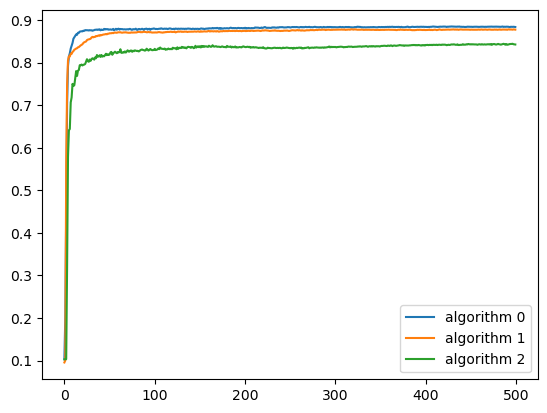

In [36]:
i = 2
for algo in algorithms:
    server_acc = data[algo]['server_acc']
    num_line = len(server_acc[0])
    x = numpy.arange(num_line)
    y = server_acc[i]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

0.8682076930999756 [0.09668341527382532, 0.12944723665714264, 0.25711892545223236, 0.5333668192227682, 0.6629145741462708, 0.8027135531107583, 0.8118257919947305, 0.8219430247942607, 0.8292127251625061, 0.83530988295873, 0.8438860774040222, 0.8467671473821003, 0.8498492439587911, 0.8534338275591533, 0.8549748659133911, 0.853199303150177, 0.8541038433710735, 0.8558459083239237, 0.8572194178899128, 0.8586599628130593, 0.8557788928349812, 0.8575544158617656, 0.8576884269714355, 0.8590284585952759, 0.8598994811375937, 0.8569848934809368, 0.857353428999583, 0.8578894535700479, 0.8584924538930259, 0.8595979809761047, 0.8568844199180603, 0.8573869466781616, 0.857889433701833, 0.858592967192332, 0.8593634764353435, 0.8560803929964702, 0.8571189045906067, 0.8579229513804117, 0.8579899271329243, 0.859564503033956, 0.8555108706156411, 0.8573534289995828, 0.8575879335403442, 0.8580569624900818, 0.8583249449729919, 0.8574539224306741, 0.8582244515419006, 0.8585259517033896, 0.8585929671923319, 0.85

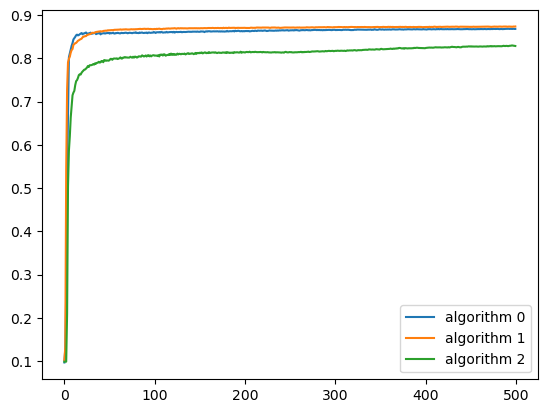

In [37]:
server_acc_mean = {}
num_line = len(data[algo]['server_acc'][0])
for algo in algorithms:
    server_acc_mean[algo] = numpy.zeros(num_line).tolist()
    for i in [0, 1, 2]:
        server_acc = data[algo]['server_acc']
        server_acc_mean[algo] += (numpy.array(server_acc[i]) / numpy.array(len(data[algo]['server_acc'])))
end_point = 500
x = numpy.arange(num_line)[:end_point]
for algo in algorithms:
    y = server_acc_mean[algo][:end_point]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

0.8647236227989197 [0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08934672921895981, 0.08944723755121231, 0.09045226126909256, 0.11336683481931686, 0.16331657767295837, 0.2010050266981125, 0.2847236096858978, 0.3156783878803253, 0.34944722056388855, 0.40743717551231384, 0.4766834080219269, 0.4998995065689087, 0.44472360610961914, 0.5115577578544617, 0.5943718552589417, 0.6120603084564209, 0.6449246406555176, 0.6583919525146484, 0.6703517436981201, 0.7173869013786316, 0.7510552406311035, 0.769949734210968, 0.775075376033783, 0.7707537412643433, 0.5773869156837463, 0.6671356558799744, 0.6244221329689026, 0.6415075063705444, 0.626733660697937, 0.6854271292686462, 0.7308542728424072, 0.7608039975166321, 0.7764824032783508, 0.7838190793991089, 0.6009045243263245, 0.6872361898422241, 0.6328642964363098, 0.67

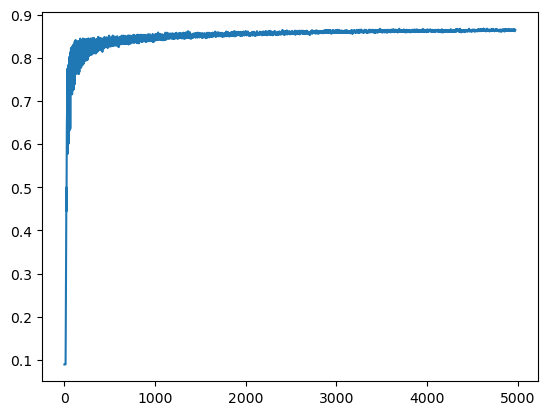

In [38]:
client_acc = data[0]['client_acc']
num_line = len(client_acc[0])
x = numpy.arange(num_line)
i = 0
y = client_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.05523933470249176 [2.232414722442627, 2.180469036102295, 2.1019856929779053, 2.0518147945404053, 1.9745391607284546, 1.8568627834320068, 1.7391332387924194, 1.6851638555526733, 1.500001311302185, 1.3384042978286743, 1.4671924114227295, 1.0711973905563354, 0.963728129863739, 0.8749014139175415, 1.1207778453826904, 1.0543177127838135, 0.8924646377563477, 1.0672541856765747, 0.8838918805122375, 0.8689628839492798, 1.0677083730697632, 1.1288187503814697, 0.8373954892158508, 0.8783082962036133, 0.8667856454849243, 1.036681890487671, 0.9368823170661926, 0.920613169670105, 1.0892326831817627, 0.8511689305305481, 0.8976905941963196, 0.6901499629020691, 1.109436273574829, 0.8872731924057007, 0.805827796459198, 0.9071242213249207, 0.875031590461731, 0.9366682171821594, 0.7595229148864746, 0.6724700331687927, 0.9701945185661316, 0.8890188932418823, 0.7421706318855286, 0.9009830355644226, 0.7847341895103455, 0.8011659383773804, 0.7525104284286499, 0.7848119735717773, 0.7959029078483582, 0.913317

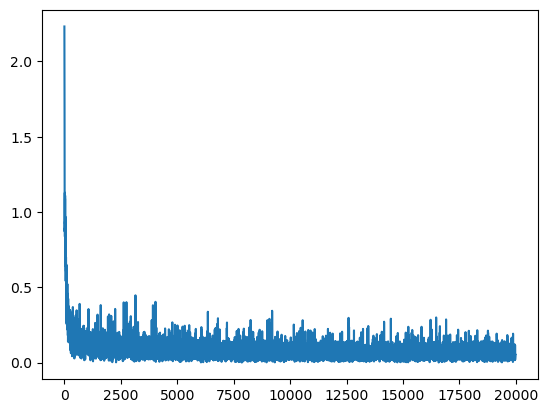

In [39]:
client_loss = data[0]['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
i = 6
y = client_loss[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.9399999976158142 [0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8399999737739563, 0.8499999642372131, 0.8549999594688416, 0.8700000047683716, 0.8700000047683716, 0.8999999761581421, 0.8650000095367432, 0.8949999809265137, 0.9049999713897705, 0.9049999713897705, 0.9099999666213989, 0.8949999809265137, 0.8999999761581421, 0.9099999666213989, 0.9099999666213989, 0.8999999761581421, 0.9099999666213989, 0.9149999618530273, 0.9099999666213989, 0.9099999666213989, 0.9099999666213989, 0.9099999666213989, 0.9049999713897705, 0.8849999904632568, 0.8849999904632568, 0.875, 0.8999999761581421, 0.9099999666213989, 0.9099999666213989, 0.9149999618530273, 0.9099999666213989, 0.8999999761581421, 0.8849999904632568, 0.8849999904632568, 0.8849999904632568, 0.8700000047683716, 0.9099999666213989, 0.9149999618530273, 0.9099999666213989, 0.9149999618530273, 0.91499996185

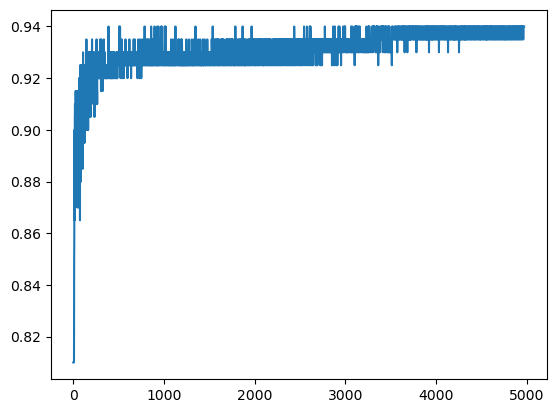

In [40]:
train_acc = data[0]['train_acc']
num_line = len(train_acc[0])
x = numpy.arange(num_line)
i = 7
y = train_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()